In [10]:
# importing built-in libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# importing non-linear optics library
import pynlo
from pynlo.interactions.FourWaveMixing import SSFM
from pynlo.media.fibers import fiber
from pynlo.light.DerivedPulses import SechPulse, GaussianPulse

50 fs pulse through nonlinear fiber using split-step Fourier model

In [3]:
# setting up parameters

FWHM    = 0.050     # pulse duration (ps)
pulseWL = 1550      # pulse central wavelength (nm)
EPP     = 50e-12    # Energy per pulse (J)
GDD     = 0.0       # Group delay dispersion (ps^2)
TOD     = 0.0       # Third order dispersion (ps^3)

Window  = 10.0   # simulation window (ps)
Steps   = 100    # simulation steps
Points  = 2**13  # simulation points

beta2   = -120     # (ps^2/km)
beta3   = 0.00     # (ps^3/km)
beta4   = 0.005    # (ps^4/km)

Length  = 20    # length in mm

Alpha   = 0.0     # attentuation coefficient (dB/cm)
Gamma   = 1000    # Gamma (1/(W km)

fibWL   = pulseWL # Center WL of fiber (nm)

Raman   = True    # Enable Raman effect?
Steep   = True    # Enable self steepening?

alpha = np.log((10**(Alpha * 0.1))) * 100  # convert from dB/cm to 1/m

Pulse energy before Simple Fiber : 0.05000000000000002 nJ
pulse energy in  2168.8948070049555
copied as   2168.8948070049555
Step: 0 Distance remaining: 0.02
Pulse energy after: 0.04891448568583004 nJ
Step: 1 Distance remaining: 0.0198
Pulse energy after: 0.04889521530938357 nJ
Step: 2 Distance remaining: 0.0196
Pulse energy after: 0.048868880301759024 nJ
Step: 3 Distance remaining: 0.0194
Pulse energy after: 0.048835315815702614 nJ
Step: 4 Distance remaining: 0.0192
Pulse energy after: 0.04879434799129516 nJ
Step: 5 Distance remaining: 0.019
Pulse energy after: 0.04874590507130721 nJ
Step: 6 Distance remaining: 0.0188
Pulse energy after: 0.048690184686442005 nJ
Step: 7 Distance remaining: 0.0186
Pulse energy after: 0.048627904377267536 nJ
Step: 8 Distance remaining: 0.0184
Pulse energy after: 0.048560665497211 nJ
Step: 9 Distance remaining: 0.0182
Pulse energy after: 0.048491452226983166 nJ
Step: 10 Distance remaining: 0.018000000000000002
Pulse energy after: 0.048425256401294296 nJ
S

Pulse energy after Simple Fiber : 0.04620313626711153 nJ


C:\Users\PallaviPunj\AppData\Local\Temp\ipykernel_35172\3916353699.py:42: RuntimeWarning: divide by zero encountered in log10
  return 10 * np.log10(np.abs(num)**2)


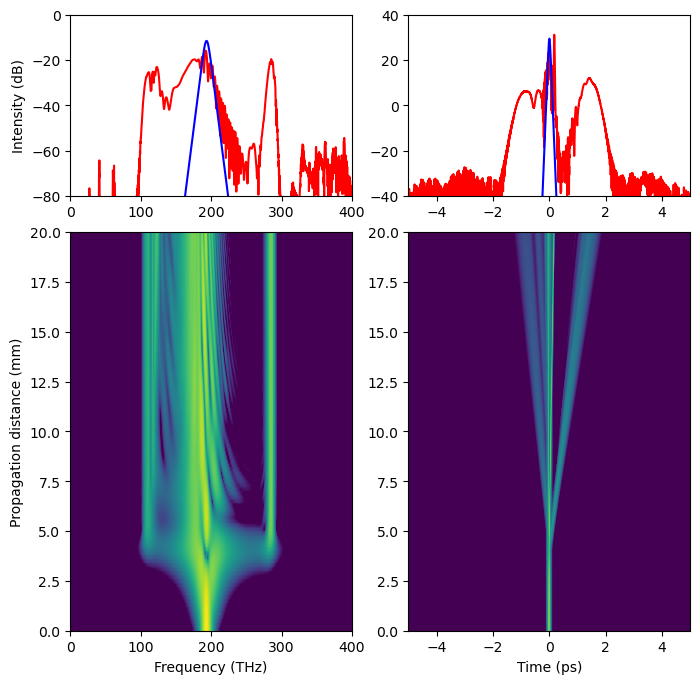

In [7]:
# set up plots for the results:

fig = plt.figure(figsize=(8,8))
ax0 = plt.subplot2grid((3,2), (0, 0), rowspan=1)
ax1 = plt.subplot2grid((3,2), (0, 1), rowspan=1)
ax2 = plt.subplot2grid((3,2), (1, 0), rowspan=2, sharex=ax0)
ax3 = plt.subplot2grid((3,2), (1, 1), rowspan=2, sharex=ax1)


######## This is where the PyNLO magic happens! ############################

# create the pulse!
pulse = pynlo.light.DerivedPulses.SechPulse(power = 1, # Power will be scaled by set_epp
                                            T0_ps                   = FWHM/1.76,
                                            center_wavelength_nm    = pulseWL,
                                            time_window_ps          = Window,
                                            GDD=GDD, TOD=TOD,
                                            NPTS            = Points,
                                            frep_MHz        = 100,
                                            power_is_avg    = False)
# set the pulse energy!
pulse.set_epp(EPP)

# create the fiber!
fiber1 = pynlo.media.fibers.fiber.FiberInstance()
fiber1.generate_fiber(Length * 1e-3, center_wl_nm=fibWL, betas=(beta2, beta3, beta4),
                              gamma_W_m=Gamma * 1e-3, gvd_units='ps^n/km', gain=-alpha)

# Propagation
evol = pynlo.interactions.FourWaveMixing.SSFM.SSFM(local_error=0.005, USE_SIMPLE_RAMAN=True,
                 disable_Raman              = np.logical_not(Raman),
                 disable_self_steepening    = np.logical_not(Steep))

y, AW, AT, pulse_out = evol.propagate(pulse_in=pulse, fiber=fiber1, n_steps=Steps)

########## That's it! Physics complete. Just plotting commands from here! ################


F = pulse.F_THz     # Frequency grid of pulse (THz)

def dB(num):
    return 10 * np.log10(np.abs(num)**2)

zW = dB( np.transpose(AW)[:, (F > 0)] )
zT = dB( np.transpose(AT) )

y_mm = y * 1e3 # convert distance to mm

ax0.plot(pulse_out.F_THz,    dB(pulse_out.AW),  color = 'r')
ax1.plot(pulse_out.T_ps,     dB(pulse_out.AT),  color = 'r')

ax0.plot(pulse.F_THz,    dB(pulse.AW),  color = 'b')
ax1.plot(pulse.T_ps,     dB(pulse.AT),  color = 'b')

extent = (np.min(F[F > 0]), np.max(F[F > 0]), 0, Length)
ax2.imshow(zW, extent=extent,
           vmin=np.max(zW) - 40.0, vmax=np.max(zW),
           aspect='auto', origin='lower')

extent = (np.min(pulse.T_ps), np.max(pulse.T_ps), np.min(y_mm), Length)
ax3.imshow(zT, extent=extent,
           vmin=np.max(zT) - 40.0, vmax=np.max(zT),
           aspect='auto', origin='lower')


ax0.set_ylabel('Intensity (dB)')
ax0.set_ylim( - 80,  0)
ax1.set_ylim( - 40, 40)

ax2.set_ylabel('Propagation distance (mm)')
ax2.set_xlabel('Frequency (THz)')
ax2.set_xlim(0,400)

ax3.set_xlabel('Time (ps)')

plt.show()

dual pump (50fs - 1064nm and 100fs 532nm) supercontinuum calculation

<IPython.core.display.Javascript object>


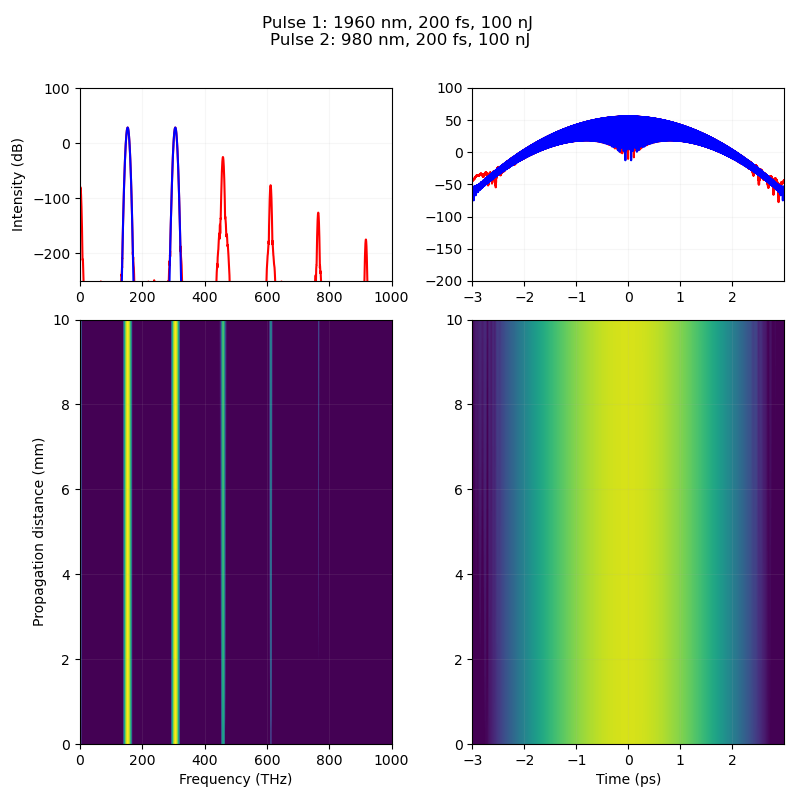

Pulse energy before Simple Fiber : 196.4310738790917 nJ
pulse energy in  6256035.182593755
copied as   6256035.182593755
Step: 0 Distance remaining: 0.01
Pulse energy after: 196.39607681957995 nJ
Step: 1 Distance remaining: 0.0095
Pulse energy after: 196.39607622254823 nJ
Step: 2 Distance remaining: 0.009000000000000001
Pulse energy after: 196.39607563719872 nJ
Step: 3 Distance remaining: 0.0085
Pulse energy after: 196.3960750635316 nJ
Step: 4 Distance remaining: 0.008
Pulse energy after: 196.3960745015462 nJ
Step: 5 Distance remaining: 0.0075
Pulse energy after: 196.39607395124213 nJ
Step: 6 Distance remaining: 0.006999999999999999
Pulse energy after: 196.39607341261905 nJ
Step: 7 Distance remaining: 0.006500000000000001
Pulse energy after: 196.39607288567655 nJ
Step: 8 Distance remaining: 0.006
Pulse energy after: 196.39607237041417 nJ
Step: 9 Distance remaining: 0.0055000000000000005
Pulse energy after: 196.3960718668312 nJ
Step: 10 Distance remaining: 0.005
Pulse energy after: 196.

In [21]:
########## Parameters:
Pulse1   = .200  # pulse duration (ps)
Pulse2   = .200

pulseWL1 = 1960.0         # pulse central wavelength (nm)\
pulseWL2 = pulseWL1/2.0   

EPP1    = 0.100e-6  # Pulse energy (J)
EPP2    = 0.100e-6
  
Length  = 10.00 # mm

GDD1     = 0.040   # Group delay dispersion (ps^2)
GDD2     = 0.040

TOD      = 0.0     # Third order dispersion (ps^3), currently the same for all pulses

Window  = 6.0   # simulation window (ps)
Steps   = 20    # simulation steps - note that the integrator typically takes many more steps than this 
Points  = 2**16 # simulation points
error   = 0.001 # the error desired for the integration. 0.001 is usually good. larger allows for faster calculations

Alpha   = 0.0   # attentuation coefficient (dB/cm, pretty sure)

Aeff = 2*np.pi*10e-6**2   # effective area in m^2
n2_per_torr = 1.1e-22/760 # nonlinearity in m^2/(W torr)

Gamma_per_torr = 2*np.pi*n2_per_torr/(pulseWL1*1e-9 * Aeff)

Raman = False # enable Raman? (calculates fused silica Raman response)
Steep = True  # enable self-steepening?

fund_THz = 3e8/(pulseWL1*1e-9) * 1e-12
loss_lo = fund_THz * 5.5
loss_hi = fund_THz * 6.5
loss  = 0 # Alpha in the special attentuation region, in dB/cm

max_pressure = 1350 # pressure in mBar
#######################


fibWL = pulseWL1   # Center WL (nm)
alpha = np.log((10**(Alpha * 0.1))) * 100  # convert from dB/cm to 1/m
loss  = np.log((10**(loss  * 0.1))) * 100

def dB(num):
    return 10 * np.log10(np.abs(num)**2)

def pressure_at_z(z):
    # code can be added here to change pressure as a function of position
    return max_pressure

def myDispersion(z):
    # pressure = pressure_at_z(z*1e3/Length)
    pressure = pressure_at_z(z*1e3/Length)
    
    waves = np.linspace(0.05, 1.2, 1000)
    RIs = 0*waves + 1 # just set the index to 1 everywhere
    return waves*1e3, RIs

def myGamma(z):
    pressure = pressure_at_z(z*1e3/Length)
    pressure_torr = pressure*760.0/1000.0
    return pressure_torr * Gamma_per_torr
    


fig = plt.figure(figsize=(8,8))
ax0 = plt.subplot2grid((3,2), (0, 0), rowspan=1)
ax1 = plt.subplot2grid((3,2), (0, 1), rowspan=1)
ax2 = plt.subplot2grid((3,2), (1, 0), rowspan=2, sharex=ax0)
ax3 = plt.subplot2grid((3,2), (1, 1), rowspan=2, sharex=ax1)

axs = (ax0, ax1, ax2, ax3)

fig.suptitle('Pulse 1: %.0f nm, %.0f fs, %.0f nJ \nPulse 2: %.0f nm, %.0f fs, %.0f nJ'%
             (pulseWL1, Pulse1*1e3, EPP1*1e9, pulseWL2, Pulse2*1e3, EPP2*1e9))


# set up the pulse parameters
pulse1 = GaussianPulse(1, Pulse1/1.76, pulseWL1, time_window_ps=Window, NPTS=Points, frep_MHz=100, power_is_avg=False)
pulse2 = GaussianPulse(1, Pulse2/1.76, pulseWL2, time_window_ps=Window, NPTS=Points, frep_MHz=100, power_is_avg=False)

pulse1.set_epp(EPP1)
pulse2.set_epp(EPP2)

pulse1.chirp_pulse_W(GDD1)
pulse2.chirp_pulse_W(GDD2)

# pulse2.rotate_spectrum_to_new_center_wl(pulseWL2)
pulse1.set_AW(pulse1.AW + pulse2.interpolate_to_new_center_wl(pulseWL1).AW)

fiber1 = fiber.FiberInstance()
fiber1.generate_fiber(Length * 1e-3, center_wl_nm=fibWL, betas=(0,0,0),
                              gamma_W_m=0, gain=-alpha)

fiber1.set_dispersion_function(myDispersion, dispersion_format='n')
fiber1.set_gamma_function(myGamma)

F = pulse1.F_THz     # Frequency grid of pulse (THz)

# include loss:
gain = -alpha * np.zeros(F.size)
# gain[((F>loss_lo)&(F<loss_hi))] = -loss
gain[((np.abs(F)>loss_lo)&(np.abs(F)<loss_hi))] = -loss
fiber1.set_gain(gain)

# Propagation
evol = SSFM.SSFM(local_error=error, USE_SIMPLE_RAMAN=True,
                 disable_Raman=np.logical_not(Raman),
                 disable_self_steepening=np.logical_not(Steep))


y, AW, AT, pulse_out = evol.propagate(pulse_in=pulse1, fiber=fiber1, n_steps=Steps, reload_fiber_each_step=True)


########## That's it! Physics complete. Just plotting commands from here! ################


def dB(num):
    return 10 * np.log10(np.abs(num)**2)

zW = dB( np.transpose(AW)[:, (F > 0)] )
zT = dB( np.transpose(AT) )

y_mm = y * 1e3 # convert distance to mm

ax0.plot(pulse_out.F_THz,    dB(pulse_out.AW),  color = 'r')
ax1.plot(pulse_out.T_ps,     dB(pulse_out.AT),  color = 'r')

ax0.plot(pulse1.F_THz,    dB(pulse1.AW),  color = 'b')
ax1.plot(pulse1.T_ps,     dB(pulse1.AT),  color = 'b')

extent = (np.min(F[F > 0]), np.max(F[F > 0]), 0, Length)

ax2.imshow(zW, extent=extent, 
           vmin=np.max(zW) - 200.0, vmax=np.max(zW), 
           aspect='auto', origin='lower')

extent = (np.min(pulse1.T_ps), np.max(pulse1.T_ps), np.min(y_mm), Length)
ax3.imshow(zT, extent=extent, 
           vmin=np.max(zT) - 100.0, vmax=np.max(zT), 
           aspect='auto', origin='lower')

ax0.set_ylabel('Intensity (dB)')
ax0.set_ylim( - 250,  100)
ax1.set_ylim( - 200, 100)

ax2.set_ylabel('Propagation distance (mm)')
ax2.set_xlabel('Frequency (THz)')
ax2.set_xlim(0,1000)

ax3.set_xlabel('Time (ps)')

for ax in axs:
    ax.grid(alpha=0.1)

plt.subplots_adjust(left=0.10, bottom=0.07, right=0.98, top=0.89, wspace=0.26, hspace=0.20)

plt.show()

Coherence modeling - 200fs pulse

Total energy: 31.8 pJ
Photons per bin (min/max/avg): 2.79e+07/-1.46e-17/6.06e+04
Total photons: 2.48e+08
[-0.00000000e+00+0.00000000e+00j  0.00000000e+00-0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... -5.92931804e-18+1.55358412e-17j
 -9.85689036e-18+2.33501828e-17j -1.34198849e-17+1.84176838e-17j]
Pulse energy before Simple Fiber : 0.19997547711293037 nJ
pulse energy in  8679.537960003203
copied as   8679.537960003203
Step: 0 Distance remaining: 0.06
Pulse energy after: 0.19889541553117404 nJ
Step: 1 Distance remaining: 0.059399999999999994
Pulse energy after: 0.19888755754362658 nJ
Step: 2 Distance remaining: 0.0588
Pulse energy after: 0.19887783056228583 nJ
Step: 3 Distance remaining: 0.058199999999999995
Pulse energy after: 0.198866181553402 nJ
Step: 4 Distance remaining: 0.0576
Pulse energy after: 0.19885254510365094 nJ
Step: 5 Distance remaining: 0.056999999999999995
Pulse energy after: 0.1988368545832925 nJ
Step: 6 Distance remaining: 0.05639999999999999
Pulse energy after:

Pulse energy after: 0.19583202093616 nJ
Step: 93 Distance remaining: 0.004199999999999997
Pulse energy after: 0.19576381981603133 nJ
Step: 94 Distance remaining: 0.003600000000000003
Pulse energy after: 0.19581317325710068 nJ
Step: 95 Distance remaining: 0.0030000000000000027
Pulse energy after: 0.19579484217040968 nJ
Step: 96 Distance remaining: 0.002400000000000002
Pulse energy after: 0.19570501639228735 nJ
Step: 97 Distance remaining: 0.0018000000000000015
Pulse energy after: 0.19558910708158792 nJ
Step: 98 Distance remaining: 0.001200000000000001
Pulse energy after: 0.19544138333952368 nJ
Step: 99 Distance remaining: 0.0006000000000000005
Pulse energy after: 0.19523220102702157 nJ
Pulse energy after Simple Fiber : 0.19564463498937162 nJ
Total energy: 31.8 pJ
Photons per bin (min/max/avg): 2.79e+07/-1.46e-17/6.06e+04
Total photons: 2.48e+08
[0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j ... 8.45031554e-18+1.22447683e-17j
 8.95373918e-1

Pulse energy after: 0.1962404428129566 nJ
Step: 85 Distance remaining: 0.009000000000000001
Pulse energy after: 0.19621006131111796 nJ
Step: 86 Distance remaining: 0.008400000000000001
Pulse energy after: 0.19595782369219836 nJ
Step: 87 Distance remaining: 0.0078
Pulse energy after: 0.19575003759065296 nJ
Step: 88 Distance remaining: 0.0072
Pulse energy after: 0.19581957120333485 nJ
Step: 89 Distance remaining: 0.006599999999999999
Pulse energy after: 0.19599538682876122 nJ
Step: 90 Distance remaining: 0.005999999999999998
Pulse energy after: 0.1960730712782994 nJ
Step: 91 Distance remaining: 0.005399999999999998
Pulse energy after: 0.1960124314330948 nJ
Step: 92 Distance remaining: 0.004799999999999998
Pulse energy after: 0.19585435202137846 nJ
Step: 93 Distance remaining: 0.004199999999999997
Pulse energy after: 0.19575628720275087 nJ
Step: 94 Distance remaining: 0.003600000000000003
Pulse energy after: 0.1958062772395645 nJ
Step: 95 Distance remaining: 0.0030000000000000027
Pulse en

Pulse energy after: 0.19633294772717277 nJ
Step: 76 Distance remaining: 0.0144
Pulse energy after: 0.19627729901604124 nJ
Step: 77 Distance remaining: 0.013799999999999998
Pulse energy after: 0.19624729919920256 nJ
Step: 78 Distance remaining: 0.013199999999999998
Pulse energy after: 0.19637994326270108 nJ
Step: 79 Distance remaining: 0.012599999999999997
Pulse energy after: 0.19635022669832658 nJ
Step: 80 Distance remaining: 0.011999999999999997
Pulse energy after: 0.19599614709559582 nJ
Step: 81 Distance remaining: 0.011399999999999997
Pulse energy after: 0.19565575920008565 nJ
Step: 82 Distance remaining: 0.010800000000000002
Pulse energy after: 0.19565984747384815 nJ
Step: 83 Distance remaining: 0.010200000000000002
Pulse energy after: 0.19598135679859197 nJ
Step: 84 Distance remaining: 0.009600000000000001
Pulse energy after: 0.19622829815850018 nJ
Step: 85 Distance remaining: 0.009000000000000001
Pulse energy after: 0.19616377854425363 nJ
Step: 86 Distance remaining: 0.0084000000

Pulse energy after: 0.19649918312387285 nJ
Step: 66 Distance remaining: 0.020399999999999998
Pulse energy after: 0.19664667846013165 nJ
Step: 67 Distance remaining: 0.019799999999999998
Pulse energy after: 0.19669263724677363 nJ
Step: 68 Distance remaining: 0.019199999999999995
Pulse energy after: 0.19681333111228666 nJ
Step: 69 Distance remaining: 0.018600000000000002
Pulse energy after: 0.19690125973043374 nJ
Step: 70 Distance remaining: 0.018000000000000002
Pulse energy after: 0.1967554996297553 nJ
Step: 71 Distance remaining: 0.017400000000000002
Pulse energy after: 0.19638598436293248 nJ
Step: 72 Distance remaining: 0.016800000000000002
Pulse energy after: 0.19602269290411345 nJ
Step: 73 Distance remaining: 0.0162
Pulse energy after: 0.19600776856070126 nJ
Step: 74 Distance remaining: 0.0156
Pulse energy after: 0.19626476832791542 nJ
Step: 75 Distance remaining: 0.015
Pulse energy after: 0.19638151148346478 nJ
Step: 76 Distance remaining: 0.0144
Pulse energy after: 0.1963419596121

C:\Users\PallaviPunj\AppData\Local\Temp\ipykernel_14396\3248809342.py:130: RuntimeWarning: divide by zero encountered in true_divide
  g12 = np.conj(E1)*E2/np.sqrt(np.abs(E1)**2 * np.abs(E2)**2)
C:\Users\PallaviPunj\AppData\Local\Temp\ipykernel_14396\3248809342.py:130: RuntimeWarning: invalid value encountered in true_divide
  g12 = np.conj(E1)*E2/np.sqrt(np.abs(E1)**2 * np.abs(E2)**2)


2 1
2 2
3 0
3 1
3 2


C:\Users\PallaviPunj\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\PallaviPunj\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


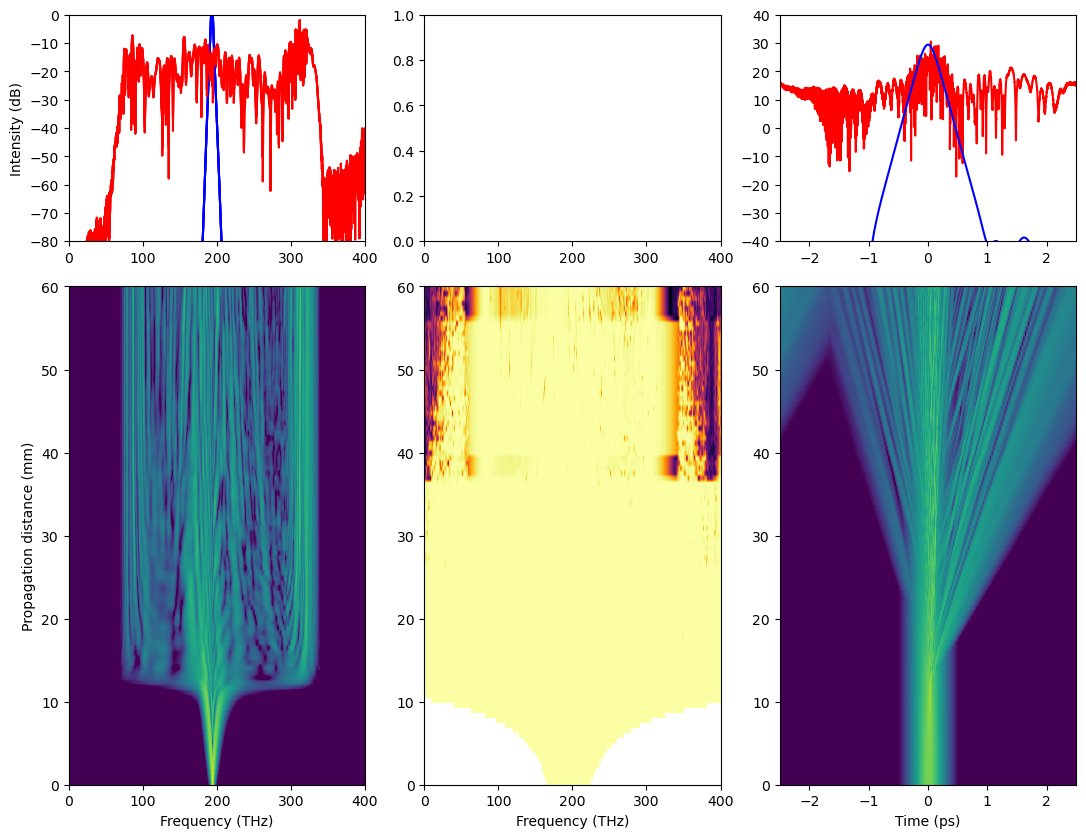

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pynlo
import matplotlib.cm as cm

FWHM    = 0.2  # pulse duration (ps)
pulseWL = 1550   # pulse central wavelength (nm)
EPP     = 200e-12 # Energy per pulse (J)
GDD     = 0.0    # Group delay dispersion (ps^2)
TOD     = 0.0    # Third order dispersion (ps^3)

Window  = 5.0   # simulation window (ps)
Steps   = 100     # simulation steps
Points  = 2**12  # simulation points
error   = 0.005  # error desired by the integrator. Usually 0.001 is plenty good. Use larger values for speed

beta2   = -40   # (ps^2/km)
beta3   = 0.00     # (ps^3/km)
beta4   = 0.001   # (ps^4/km)
        
Length  = 60    # length in mm
    
Alpha   = 0.0     # attentuation coefficient (dB/cm)
Gamma   = 1000    # Gamma (1/(W km) 
    
fibWL   = pulseWL # Center WL of fiber (nm)
    
Raman   = True    # Enable Raman effect?
Steep   = True    # Enable self steepening?

alpha = np.log((10**(Alpha * 0.1))) * 100  # convert from dB/cm to 1/m


# set up plots for the results:
fig = plt.figure(figsize=(13,10))
ax0 = plt.subplot2grid((3,3), (0, 0), rowspan=1)
ax1 = plt.subplot2grid((3,3), (1, 0), rowspan=2, sharex=ax0)

ax2 = plt.subplot2grid((3,3), (0, 1), rowspan=1)
ax3 = plt.subplot2grid((3,3), (1, 1), rowspan=2, sharex=ax2)

ax4 = plt.subplot2grid((3,3), (0, 2), rowspan=1)
ax5 = plt.subplot2grid((3,3), (1, 2), rowspan=2, sharex=ax4)

# create the fiber!
fiber1 = pynlo.media.fibers.fiber.FiberInstance()
fiber1.generate_fiber(Length * 1e-3, center_wl_nm=fibWL, betas=(beta2, beta3, beta4),
                              gamma_W_m=Gamma * 1e-3, gvd_units='ps^n/km', gain=-alpha)
                                
# Propagation
evol = pynlo.interactions.FourWaveMixing.SSFM.SSFM(local_error=error, USE_SIMPLE_RAMAN=True,
                 disable_Raman              = np.logical_not(Raman), 
                 disable_self_steepening    = np.logical_not(Steep))                                
                                

# create the pulse!
original_pulse = pynlo.light.DerivedPulses.SechPulse(power = 1, # Power will be scaled by set_epp
                                            T0_ps                   = FWHM/1.76, 
                                            center_wavelength_nm    = pulseWL, 
                                            time_window_ps          = Window,
                                            GDD=GDD, TOD=TOD, 
                                            NPTS            = Points, 
                                            frep_MHz        = 100, 
                                            power_is_avg    = False)
original_pulse.set_epp(EPP) # set the pulse energy 


def include_noise(Pulse):
    import copy
    W = Pulse.W_THz
    A = Pulse.AW
    
    size_of_bins = np.gradient(W)
    
    energy_per_bin = np.abs(A)**2/size_of_bins * 1e-12
    
    h = 6.62607004e-34
    photon_energy = h * W/(2*np.pi) * 1e12
    photons_per_bin = energy_per_bin/photon_energy
    
    print('Total energy: %.1f pJ'%(np.sum(energy_per_bin) * 1e12))
    # plt.plot(F, photons_per_bin)
    print('Photons per bin (min/max/avg): %.2e/%.2e/%.2e\nTotal photons: %.2e'%(np.max(photons_per_bin),
           np.min(photons_per_bin),np.mean(photons_per_bin), np.sum(photons_per_bin)))
          
    
    size = np.shape(A)[0]
    random_intensity = np.random.normal(size=size)
    random_phase = np.random.uniform(size=size) * 2 * np.pi
        
    photons_per_bin[photons_per_bin<0] = 0
    noise = random_intensity * np.sqrt(photons_per_bin) * photon_energy * size_of_bins * 1e12 * np.exp(1j*random_phase)
    
    print(noise)
    
    output_pulse = copy.copy(Pulse)
    output_pulse.set_AW(A + noise)
    
    return output_pulse
    
    # plt.plot(W, A, label='before')
    # plt.plot(W, Pulse.AW, label='with noise')
    # ax0.plot(W, (A - Pulse.AW))
    #
    # plt.legend(frameon=False)
    #
    # plt.show()
    
    
trials = 4
# np.random.seed(0)

for num in range(0,trials):

    pulse = include_noise(original_pulse)
    y, AW, AT, pulse_out = evol.propagate(pulse_in=pulse, fiber=fiber1, n_steps=Steps)
        
    if 'AW_stack' not in locals():
        AW_stack = AW
    else:
        AW_stack = np.dstack((AW, AW_stack))

AW_stack = AW_stack.transpose()
print(np.angle(AW_stack)/np.pi)

for n1, E1 in enumerate(AW_stack):
    for n2,E2 in enumerate(AW_stack[np.arange(trials) != n1]):
        
        print(n1, n2)
        g12 = np.conj(E1)*E2/np.sqrt(np.abs(E1)**2 * np.abs(E2)**2)
        if 'g12_stack' not in locals():
            g12_stack = g12
        else:
            g12_stack = np.dstack((g12, g12_stack))


# print g12_stack.shape, g12_stack.transpose().shape
g12 = np.abs(np.mean(g12_stack, axis=2))


F = pulse_out.F_THz     # Frequency grid of pulse (THz)

def dB(num):
    return 10 * np.log10(np.abs(num)**2)

for AW in AW_stack:
    zW = dB(AW[:, (F > 0)] )
    ax0.plot(F[F>0],    zW[0],  color = 'b')
    ax0.plot(F[F>0],    zW[-1],  color = 'r')
    

zT = dB( np.transpose(AT) )
ax4.plot(pulse_out.T_ps,     dB(pulse_out.AT),  color = 'r')
ax4.plot(pulse.T_ps,     dB(pulse.AT),  color = 'b')



extent = (np.min(F[F > 0]), np.max(F[F > 0]), 0, Length)
ax1.imshow(zW, extent=extent, 
           vmin=np.max(zW) - 40.0, vmax=np.max(zW), 
           aspect='auto', origin='lower')


extent = (np.min(F), np.max(F), 0, Length)
ax3.imshow(g12, extent=extent, clim=(0,1), aspect='auto', origin='lower', cmap=cm.inferno)

extent = (np.min(pulse.T_ps), np.max(pulse.T_ps), 0, Length)
ax5.imshow(zT, extent=extent, 
           vmin=np.max(zT) - 40.0, vmax=np.max(zT), 
           aspect='auto', origin='lower')
          

ax0.set_ylabel('Intensity (dB)')
ax0.set_ylim( -80,  0)
ax4.set_ylim( -40, 40)

ax1.set_ylabel('Propagation distance (mm)')
for ax in (ax1,ax3):
    ax.set_xlabel('Frequency (THz)')
    ax.set_xlim(0,400)



ax5.set_xlabel('Time (ps)')

plt.show()

In [16]:
%matplotlib notebook